[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ecotrust/DL-Training/blob/main/notebooks/chapter1.ipynb)


Notes from Chapter 1 of the book "Modern computer vision with pytorch" by V. Kishore Ayyadevara and Yeshwanth Reddy (2020).

This notebook was modified from the original version available [here](https://github.com/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter01/Chain_rule.ipynb).

# Artificial Neural Networks 

Artificial neural networks (ANNs) are a class of machine learning algorithms inspired by the human brain's biological neural networks (BNNs). BNNs are composed of billions of neurons connected to each other, forming a powerful processing unit that allows us to interact with our environment, learn from it, and adapt to it. As depicted in the figure below, our sensory system collects and encodes information from the environment and sends it to the brain, where it is processed and evaluated against prior experiences to trigger appropriate responses.

<fugure>
    <img src="figures/fig21_pandya_and_macy.jpg" width="500">
    <figcaption>From A.S. Pandya and R.B. Macy. 1996. Pattern recognition with neural networks in C++. CRC Press, Florida.</figcaption>
</figure>

ANNs aims to replicate how individual neurons process and transfer information in the brain. Neurons are the brain's basic processing units, composed of a cell body, dendrites, and an axon. The cell body contains the nucleus and the cytoplasm, the site of the neuron's metabolic activity. Dendrites are the input structures of the neuron, and they receive signals from other neurons. The axon is the output structure of the neuron, and it transmits signals to other neurons. If you want to learn more about how neurons communicate with each other, you can check out this [video](https://youtu.be/OvVl8rOEncE).

The artificial neuron is a computational model that emulates some properties of biological neurons (see figure below). The simplest neuron architecture is composed of a set of inputs (analogous to dendrites), a set of weights (analogous to synapses),  and an activation function (analogous to the neuron action potential mechanism). The inputs are signals/data fed to the neurons from an input layer or other neurons. The weights modulate the importance of the information, analogous to the strength of the synapsis connecting two neurons. The activation function is a non-linear function that determines the neuron's output. 

<fugure>
    <img src="figures/neuron_perceptron.svg" width="1000">
    <figcaption>Modified from <a href="https://www.khanacademy.org/test-prep/mcat/organ-systems/neural-synapses/a/signal-propagation-the-movement-of-signals-between-neurons">Khan Academy</a></figcaption>
</figure>


# Deep Learning Fundamentals

Modern deep learning algorithms involve two main subroutines: 
- **Feedforward propagation**: During this stage, the data is feed into the model and the output and an error associated with it are computed. A series of operations are performed on the data to extract features, that is patterns or "motifs" that are useful to predict a given output, such as faces or objects, edge detection, etc.

- **Backpropagation**: Consist of finding the set of parameters that minimizes the error between model predictions and the input data. This is done by computing the gradient of the error function with respect to the parameters and updating the parameters in the opposite direction of the gradient. This is done iteratively until the error is acceptable for the task at hand.

## Feedforward propagation

There are three steps involved in feedforward propagation: pre-activation, activation, and post-activation. During pre-activation, the hidden layer is obtained by computing the product of inputs and weights (dot product for matrices). During activation, we apply a non-linear activation function $f$ to the hidden layer. Finally, the post-activation consist in the computation of the sum of products of the hidden layer activation values and the weights to produce the output $\hat y$. A cost function is then used to compute the prediction error or loss. 

The output is typically calculated as follows:

$\hat y = f(b_i + \sum_{i=1}^{n} w_ix_i)$

where 

$\hat y$ is the output or prediction outcome as a continuous or discrete variable.

$f$ is the activation function.

$b$ is the bias term.

$w_i$ are the weights that link input, hidden, and output layers.

$x_i$ are the input values. 

As an example, consider a network with two inputs, one hidden layer with three neurons, and one output as shown in the figure below. 

<fugure>
    <img src="figures/3neuron_arch.png" width="500">
    <figcaption>Modified from figure in page 17, Ch.1</figcaption>
</figure>

To think in our network architecture in more concrete terms, lets add some synthetic data. 

$x = \begin{pmatrix} 1 & 1 \end{pmatrix}$

$w^h = \begin{pmatrix}-0.0053 & -0.582 & -0.2723\\\ 0.3793 & -0.5204 & 0.1896 \end{pmatrix}$ 

$w^o = \begin{pmatrix}0.1528\\\ -0.1745\\\ -0.1135 \end{pmatrix}$

$b^h = \begin{pmatrix} -0.0140 & 0.5607 & -0.0628 \end{pmatrix}$

$b^o = \begin{pmatrix} -0.5516 \end{pmatrix}$

$y = 0$

Our input layer is $x$, $w^h$ is the weight matrix connecting the input and hidden layers, $b^h$ are the bias associated with the hidden layer, $w^o$ are the weights connecting the hidden layer and the output, $b^o$ is the bias associated with the output, and $y$ is a continuous variable with the observation we want to predict. The first pass of feedforward propagation uses an arbitrary selection (usually a random sample) of weights and bias. 

Note that $w^h$ have 2(inputs) x 3(neurons) = 6 weights and $w^o$ has 3(neurons) = 3 weights. 

Let's implement each step of the feedforward propagation in python.

In [1]:
import numpy as np 

# Set x, w (weights for input and hidden layers), and w0 (bias for input and hidden layers)
x = np.array([[1, 1]])
w_h = np.array([[-0.0053, -0.582 , -0.2723],
                [ 0.3793, -0.5204,  0.1896]], dtype=np.float32)
w_o = np.array([[ 0.1528], [-0.1745], [-0.1135]], dtype=np.float32)
b_h = np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32)
b_o = np.array([-0.5516], dtype=np.float32)

# Compute hidden layer
h = (x @ w_h) + b_h
print(np.round(h,3))

[[ 0.36  -0.542 -0.145]]


### Activation function 

The activation function allows to introduce non-linearity into the model. It determines which neurons are activated (i.e. pass a non-zero value to the next layer) and which are set to zero. The most common activation functions are the rectified linear unit or ReLU, tanh, and sigmoid.

Let's apply a sigmoid activation, defined as follows:

$f(x) = \frac{1}{1 + e^{-x}}$


In [2]:
# Compute activation. One value for each node in the hidden layer.
f_h = 1/(1 + np.exp(-h))
print("f(h) =", np.round(f_h, 3))

f(h) = [[0.589 0.368 0.464]]


After activation, we can compute the network output y_hat. We use the same procedure used to compute the hidden layer, but this time we calculate the dot product of the activation and the weights associated with the output layer plus the output bias.

In [3]:
# Compute output value y_hat
y_hat = (f_h @ w_o) + b_o
print("y_hat =", np.round(y_hat, 3))

y_hat = [[-0.578]]


### Loss function

The loss function is used to compute the error between the model prediction and the observed value. There are many ways to estimate the loss. A widely used loss function for continuos problems (e.g. predicting housing prices) is the mean squared error (MSE), which is defined as: 

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

where

$y_i$ is the observed value.

$\hat{y}_i$ is the predicted value.

Another common loss function is the cross-entropy loss, which is used for classification problems (e.g. land use/cover classification). It is defined as:

$CE = -\frac{1}{n}\sum_{i=1}^{n}y_i\log(\hat{y}_i)$

For this example we use the MSE loss function. 

The observed value is y = 0 and n = 1 because we have only one prediction, thus 

$MSE = \frac{1}{1}(0 - (-0.578))^2 = (0.578)^2$



In [4]:
# Compute loss
loss = np.square(y_hat)
print('loss =', np.round(loss, 3)) 

loss = [[0.335]]


# Backpropagation

During backpropagation, the weights are adjusted to minimize the error (loss). The process consists of adjusting the weights one at a time by a small amount.

Steps:

1. Change one weight at a time by adding a small amount to it.
2. Calculate the change in the loss induced by this change.
3. Update the weight by $-k \frac {\delta L}{\delta W}$, where $k$ is the learning rate and $\frac {\delta L}{\delta W}$ is the change in the loss induced by the change in the weight, aka the gradient.
4. Repeat steps 1-3 n *epochs* or iterations over the entire dataset.

<fugure>
    <img src="figures/3neuron_arch_bp.png" width="500">
</figure>


To see the steps involved in backpropagation more clearly, let's update only one weight from $w_h$, say $w^h_{11}$. Later on we will define some methods to perform the operations automatically on all weights.

In [5]:
# Copy w_h to preserve the original weights for later use
from copy import deepcopy
w_h_tmp = deepcopy(w_h) 
w_h_updated = deepcopy(w_h)

# Change the first weight in w_h by an arbitrary small amount.
w_h_tmp[0][0] = w_h[0][0] + 0.0001

# Re-compute the loss with the modified weight
# We need to re-compute all feedforward propagation steps
# although in this case we use the temporal weight matrix w_h_tmp
h = (x @ w_h_tmp) + b_h
f_h = 1/(1 + np.exp(-h))
tmp_y_hat = (f_h @ w_o) + b_o
tmp_loss = np.square(tmp_y_hat)

# Compute the gradient of the loss with respect to the first weight in w_h
grad = (tmp_loss - loss) / 0.0001

# Calculate new weight using a learning rate of 0.1
w_h_updated[0][0] = w_h[0][0] - 0.1 * grad

# Re-compute the loss with the updated weight
h = (x @ w_h_updated) + b_h
f_h = 1/(1 + np.exp(-h))
new_y_hat = (f_h @ w_o) + b_o
new_loss = np.square(new_y_hat)

print(
    'original weight:', np.round(w_h[0][0], 4),
    '\nupdated weight =', np.round(w_h_updated[0][0], 5),
    '\noriginal y_hat =', np.round(y_hat, 5),
    '\nnew y_hat =', np.round(new_y_hat, 5),
    '\ngradient =', np.round(grad, 3),
    '\noriginal loss =', np.round(loss, 3),
    '\nnew loss =', np.round(new_loss, 3)
)

original weight: -0.0053 
updated weight = -0.00102 
original y_hat = [[-0.5784]] 
new y_hat = [[-0.57824]] 
gradient = [[-0.043]] 
original loss = [[0.335]] 
new loss = [[0.334]]


In the results above, note that new_loss < loss and that the new prediction new_y_hat also improved slightly over y_hat. By appliying the same steps on all weights and bias, we can iteratively improve the model until the loss is acceptable. An **epoch** is a complete pass over the entire dataset, where all elements in $w^h$, $w^o$, $b^h$, and $b^o$ are adjusted.

Let's see the effect of adjusting weights and bias over multiple epochs. To make the process more efficient, we will define one function to perform feedforward and one to perform backpropagation.

In [6]:
def feed_forward(x, y, W):
    '''Implements feedfordward propagation from scratch.
    
    Parameters
    ----------
    x: array
      Input layer <- training data
    y: array
      Observations <- this is what we want to predict.
    W: list
      Weights and bias for input, hidden, and output layers.
    
    Returns
    -------
    float
      Loss as the Mean Square Error (MSE).
    '''
    # Pre-activation
    # Calculate hidden layer as the product w_i*x_i (dot product for matrix multiplication) plus the bias.
    # W[0] = w_h, the weights connecting input layer with hidden layer. 
    # W[1] = b_h, the bias associated with the hidden layer.
    h = np.dot(x, W[0]) + W[1]
    
    # Activation
    # Apply f as a sigmoid activation function.
    f_h = 1/(1+np.exp(-h))

    # Post-activation
    # Calculate the output layer (a)
    # W[2] = w_o, the weights connecting the hidden layer with the output layer. 
    # W[3] = b_o, the bias associated with the output layer.
    y_hat = np.dot(f_h, W[2]) + W[3]
    
    # Calculate the loss as the MSE 
    mean_squared_error = np.mean(np.square(y - y_hat))

    return mean_squared_error


def update_weights(x, y, W, k):
    '''Implements gradient descent from scratch.
    
    Parameters
    ----------
    x: array
      Input layer with training data
    y: array
      Observations we want to predict
    W: list 
      Weights and bias for input, hidden, and output layers
    k: float
      Learning rate
    
    Returns
    -------
    (list, list)
      Tuple with list of updated weights and list of original weights
    '''
    # Create copies of the original weights list.
    original_weights = deepcopy(W)
    temp_weights = deepcopy(W)
    updated_weights = deepcopy(W)

    # Calculate loss with original set of weights.
    original_loss = feed_forward(x, y, original_weights)

    # Iterate through each weight in W. 
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(W)
            # Update one weight at a time by a small amount.
            temp_weights[i][index] += 0.0001
            # Re-calculate loss with updated weight.
            _loss_plus = feed_forward(x, y, temp_weights)
            # Calculate the gradient of the loss with respect to the weight.
            grad = (_loss_plus - original_loss)/(0.0001)
            # Reduce the weight in proportion to the gradient multiplied by the learning rate (k).
            updated_weights[i][index] -= k*grad

    return updated_weights, original_loss

We'll use the same data as previously, but for convenience we'll pack it to feed it to the functions.

In [7]:
# Observations
y = np.array([[0]])  
# Pack all weights and bias into a list 
W = [w_h, b_h, w_o, b_o]

Text(0.5, 1.0, 'Loss over increasing number of epochs')

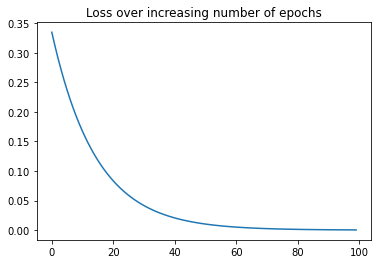

In [8]:
import matplotlib.pyplot as plt

epochs = 100
k = 0.01
losses = []
w = deepcopy(W)
for epoch in range(epochs):
    w, loss = update_weights(x,y,w,k)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

# Backpropagation using the Chain Rule

So far we studied a way to implement **gradient descent** using brute force to estimate the gradient, which involves computing $h_i$, $f(h_i)$, $\hat y$, and the loss for every weight and bias. This is not a very efficient way to perform backpropagation.

The chain rule allows us to compute the gradient analytically, which offers a shortcut that save us several steps. The algorithm consist of calculating the gradient wrt each weight and bias in the network using the product of its partial derivatives, that is the individual components that contribute to the gradient. For example, the gradient of the loss wrt $w^h_{11}$ is:

change in loss wrt $w^h_{11}$ = change in loss wrt $\hat y$ * change in $\hat y$ wrt $f(h_1)$ * change in $f(h_1)$ wrt $h_1$ * change in $h_1$ wrt $w^h_{11}$

Using derivative notation, the expression above looks like this:

$\frac {\delta L}{\delta w^h_{11}} = \frac {\delta L}{\delta \hat y} \cdot \frac {\delta \hat y}{\delta f(h_1)} \cdot \frac {\delta f(h_1)}{\delta h_1} \cdot \frac {\delta h_1}{\delta w^h_{11}}$

The Figure below depicts the partial derivates contributing to the gradient of the loss wrt $w^h_{11}$.

<fugure>
    <img src="figures/3neuron_chain_rule.png" width="500">
</figure>

Solving the partial derivatives and simplifying (see details in pages 35-36 of the book), the equation becomes:

$\frac {\delta L}{\delta w^h_{11}} = -2 \cdot (y - \hat y) \cdot w^o_{1} \cdot f(h_1) \cdot (1 - f(h_1)) \cdot x_1$

Let's confirm that using the chain rule yiels the same result we obtained before to update weights. 

In [9]:
h = np.dot(x, w_h) + b_h
f_h = 1/(1+np.exp(-h))
y_hat = np.dot(f_h, w_o) + b_o

# Extract individual values
y_hat_1 = y_hat[0][0]
y = 0 
w_11 = w_h[0][0]
w_o_1 = w_o[0][0]
f_h_1 = f_h[0, 0]
x_1 = x[0][0]

In [10]:
# Update weights by brute force
updated_weights, _ = update_weights(x, y, W, .01)
print('Brute-force w_11:', np.round(updated_weights[0][0][0], 5))

# Update weights using the chain rule
w_11_updated = w_11 - (.01) * -2 * (y - y_hat_1) * (w_o_1) * f_h_1 * (1 - f_h_1) * x_1
print('Chain rule w_11:', np.round(w_11_updated, 5))

Brute force w_11: -0.00487
Chain rule w_11: -0.00487


updated_weights[0][0][0]

In [11]:
def update_weights_cr(w, w_o, f_h, x, k):
    '''Update weights using the Chain Rule.

    Parameters
    ----------
    w: float
        Weight to modify
    w_o: float
        Partial derivative of y_hat wrt f_h. 
    f_h: float
        Activation value of the hidden layer.
    x: int
        Input value 
    k: float
        Learning rate

    Returns
    -------
    float 
        New weight value.
    '''
    return w - k * (-2 * (y - y_hat) * (w_o) * f_h * (1 - f_h) * x)

In [13]:
# Update w_h weights.
import pandas as pd

df = pd.DataFrame(columns=['w_h', 'w_o', 'f_h', 'update_weights', 'update_weights_cr'])

# Extract parameters.
df['w_h'] = W[0].flatten()
df['w_o'] = np.array([w_o, w_o]).flatten()
df['f_h'] = np.array([f_h[0], f_h[0]]).flatten()

# Calculate new weights using update_weights function (for comparison).
df['update_weights'] = updated_weights[0].flatten()

# Calculate new weights using the Chain Rule.
df['update_weights_cr'] = df.apply(lambda row: update_weights_cr(row['w_h'], row['w_o'], row['f_h'], 1, .01)[0][0], axis=1)
df

,w_h,w_o,f_h,update_weights,update_weights_cr
0,-0.0053,0.1528,0.589040,-0.004872,-0.004872
1,-0.5820,-0.1745,0.367792,-0.582469,-0.582469
2,-0.2723,-0.1135,0.463689,-0.272626,-0.272627
3,0.3793,0.1528,0.589040,0.379728,0.379728
4,-0.5204,-0.1745,0.367792,-0.520869,-0.520869
5,0.1896,-0.1135,0.463689,0.189273,0.189273
